<a href="https://colab.research.google.com/github/solozano0725/diplomadoMLNivel1/blob/main/DipMLsesion22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

# **Diplomado de Análisis de datos y Machine Learning en Python**


El presente diplomado hace parte del centro de Big Data de la facultad de ciencias exactas y naturales (FCEN) de la Universidad de Antioquia.

## **Sesión 22**

## **Contenido**

- <a href="#apr"> Aprendizaje no supervisado</a><br>
  - <a href="#pca"> **Reducción de dimensionalidad**: PCA</a><br>
  - <a href="#clu"> **Clustering**: K-means</a><br>
- <a href="#ele"> Elección del modelo de aprendizaje</a><br>



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, load_breast_cancer, load_digits

from mlxtend.plotting import plot_decision_regions

# **Aprendizaje no supervisado**

Hasta ahora, hemos estado analizando en profundidad los estimadores de aprendizaje supervisado: aquellos estimadores que predicen etiquetas basadas en datos de entrenamiento etiquetados. 

En el aprendizaje no supervisado, el conjunto de datos es una colección de instancias **sin etiquetar**. El objetivo de un algoritmo de aprendizaje no supervisado es crear un modelo que tome una matriz de características como entrada y la transforme en otra matriz o en un valor que pueda usarse para resolver un problema práctico. 

Vamos a ver varios estimadores no supervisados, que pueden resaltar aspectos interesantes de los datos sin hacer referencia a etiquetas conocidas. Algunas tareas típicas del aprendizaje no supervisado son:

* ***Clustering***: En la agrupación en *clusters*, el modelo devuelve la identificación (etiqueta) de un cluster para cada instancia en el conjunto de datos.

* **Reducción dimensional**: En la reducción de dimensionalidad, la salida del modelo es una matriz de características que tiene menos características que la matriz de características de entrada 

* **Detección de valores atípicos**: En la detección de valores atípicos, la salida es un número real que indica qué tan diferente es una instancia particular de los datos "típicos" en el conjunto de datos


Los algoritmos no supervisados se utilizan a menudo en una fase exploratoria, cuando deseamos comprender mejor los datos, en lugar de utilizarlos como parte de un sistema automático más grande.





<p><a name="pca"></a></p>

## **Reducción de dimensionalidad: PCA**
 
En algunos escenarios donde los datos tienen una gran cantidad de características, a menudo es deseable reducir la dimensionalidad de los datos o encontrar una representación de menor dimensión que conserve en cierta medida algunas de las propiedades de los datos. Las razones clave para las técnicas de reducción de dimensionalidad son:

* **Computacional:** Comprimir los datos iniciales como un paso de preprocesado para acelerar las operaciones subsecuentes en los datos.

* **Visualización**: Visualizar los datos para un análisis exploratorio mediante el mapeo de los datos de entrada a un espacio de dos o tres dimensiones.

* **Extracción de características:** Generar un conjunto más pequeño/efectivo/útil de características.

* **Ruido:** Reducir el ruido intrínseco de los datos.

Las técnicas de reducción de dimensionalidad tienen como objetivo general encontrar una representación de los datos en dimensiones inferiores, que de alguna manera sea fiel a la representación original.

Una de las técnicas clásicas de reducción de dimensinalidad es la del PCA (*Principal Component analysis*). Esta proporciona un nuevo sistema de coordenadas jerárquico (construido a partir de los datos), definido por *las componentes principales*, que permite representar datos correlacionados de alta dimensionalidad. 

¿Cómo se pueden encontrar las componentes principales de un conjunto de datos? Existe una técnica estándar de factorización de matrices llamada *Singular Value Decomposition* (SVD) que puede descomponer las características en la multiplicación matricial de tres matrices

$$
\mathbf{X} = \mathbf{U} \; \mathbf{\Sigma} \;\mathbf{V}
$$

donde $V$ contiene todas las componentes principales que estamos que queremos encontrar.

Si queremos reducir la dimensionalidad de nuestros datos a una dimensión $d < D$, elegimos las primeras $d$ componentes principales y proyectamos los datos sobre estas (sobre un hiperplano)

Para proyectar el conjunto de datos en la representación de dimensión inferior, simplemente se multiplica la matriz de características $\mathbf{X}$ por la matriz $\mathbf{W}_d$, definida como la matriz que contiene las primeras $d$ componentes principales, es decir, la matriz compuesta por las primeras $d$ columnas de $\mathbf{V}$

$$
\mathbf{X}_{\text{new}} = \mathbf{X}\; \mathbf{W}_d
$$



El algoritmo del PCA es el siguiente (ver siguiente figura):

* Se comienza por centrar los datos originales restando su media $\mathbf{\bar X}$

* En este punto encontramos las componentes principales. Estas son básicamente vectores que definen este nuevo sistema de coordenadas en el que el primer eje va en la dirección de mayor varianza en los datos. El segundo eje es ortogonal al primero y va en la dirección de la segunda varianza más alta en los datos. Si nuestros datos fueran tridimensionales, el tercer eje sería ortogonal tanto al primer como al segundo eje e iría en la dirección de la tercera varianza más alta, y así sucesivamente. 

* Luego, utilizamos estos vectores para definir un nuevo sistema coordenado en el que representamos los datos. En esta representación rotada encontrada por PCA, los dos ejes no están correlacionados, lo que significa que la matriz de correlación de los datos en esta representación es cero excepto por la diagonal.

* Como vimos, podemos utilizar PCA para la reducción de dimensionalidad conservando solo algunas de las componentes principales. En este ejemplo, mantenemos solo la primera componente principal: proyectamos los datos sobre la primera componente principal. Esto reduce los datos de un conjunto de datos bidimensional a un conjunto de datos unidimensional. 

* Podriamos realizar una transformación inversa y representar los datos en el espacio original

Noten la diferencia respecto a la selección de características que habíamos realizado: en lugar de eliminar alguna de las características originales, lo que hacemos es encontrar las dos componentes principales y proyectar los datos sobre la primera componente principal, que es la dirección más informativa. Esto es lo que se conoce como extracción de características.

![](https://i.imgur.com/MdSr7nd.png)

Podemos implementar el PCA utilizando el estimador `PCA` del submódulo `decomposition` de Sklearn:

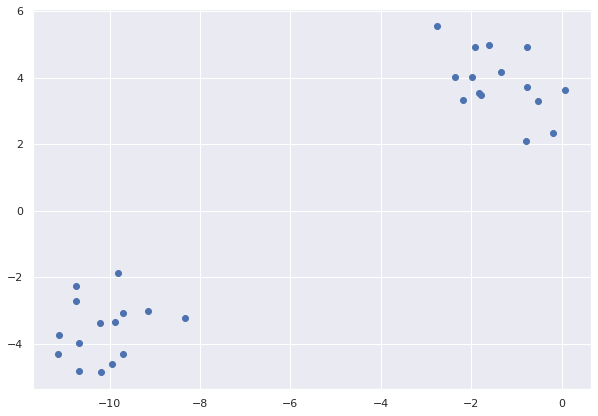

In [ ]:
n = 30
X, _ = make_blobs(n_samples=n, n_features=2, centers=2, cluster_std=1 ,random_state=1)

plt.figure(figsize=(10,7))
plt.scatter(X[:,0], X[:,1]);

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()

X_pca = pca.fit_transform(X)
X_pca.shape

(30, 2)

Como vimos, Las componentes principales corresponden a las direcciones en los datos originales, por lo tanto son combinaciones de las características originales. Estas se encuentran en el atributo `components_`

In [ ]:
pca.components_

array([[-0.76094465, -0.6488168 ],
       [-0.6488168 ,  0.76094465]])

Cada fila en `components_` corresponde a una componente principal y se organizan dependiendo de su importancia. Asímismo, cada columna corresponde a cada una de las caraterísticas originales. 

Las entradas de `explained_variance_` corresponden a la cantidad de varianza contenida por cada una de las componentes principales.


In [ ]:
pca.explained_variance_

array([34.66477965,  0.87738657])

alternativamente, el atributo `explained_variance_ratio_` indica la proporción de la varianza del conjunto de datos que se encuentra a lo largo del eje de cada componente principal

In [ ]:
pca.explained_variance_ratio_

array([0.97531421, 0.02468579])

Podemos proyectar los datos definiendo el número de componentes que queremos utilizar mediante el parámetro `n_components`. Proyectemos los datos en la primera componente principal

In [ ]:
pca = PCA(n_components=1)

X_pca = pca.fit_transform(X)

X_pca.shape

(30, 1)

Finalmente, podemos deshacer la rotación para tener los datos reducidos en el espacio original, utilizando el método `inverse_transform`

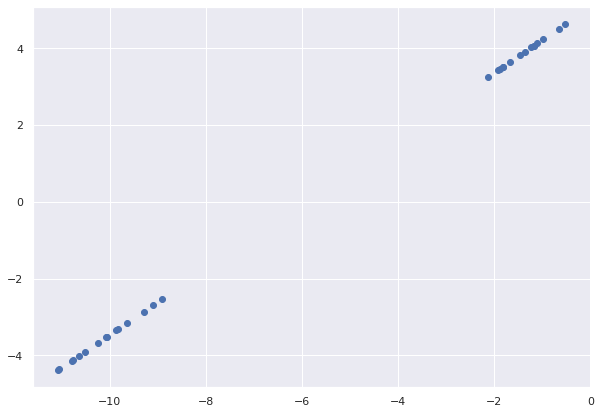

In [ ]:
Xr = pca.inverse_transform(X_pca)

Xr.shape

plt.figure(figsize=(10,7))
plt.scatter(Xr[:,0], Xr[:,1]);

Estos puntos están en el espacio de características original, pero solo conservamos la información contenida en la primera componente principal. Esta transformación a veces se utiliza para eliminar los efectos de ruido de los datos o visualizar qué parte de la información se retiene utilizando los componentes principales.


**Visualización**

Una de las aplicaciones más comunes del PCA es visualizar conjuntos de datos de alta dimensionalidad. 

Por ejemplo, el conjunto de datos de cancer de mama:



In [ ]:
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

print(df.shape)
df.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Usar un diagrama de dispersión para visualizar el conjunto de datos sería muy complicado: Este conjunto de datos tiene 30 características, lo que daría como resultado muchos diagramas de dispersión, lo que hace el análisis muy complejo. Sin embargo, hay una visualización aún más simple que podemos usar: calcular histogramas de cada una de las características para las dos clases:

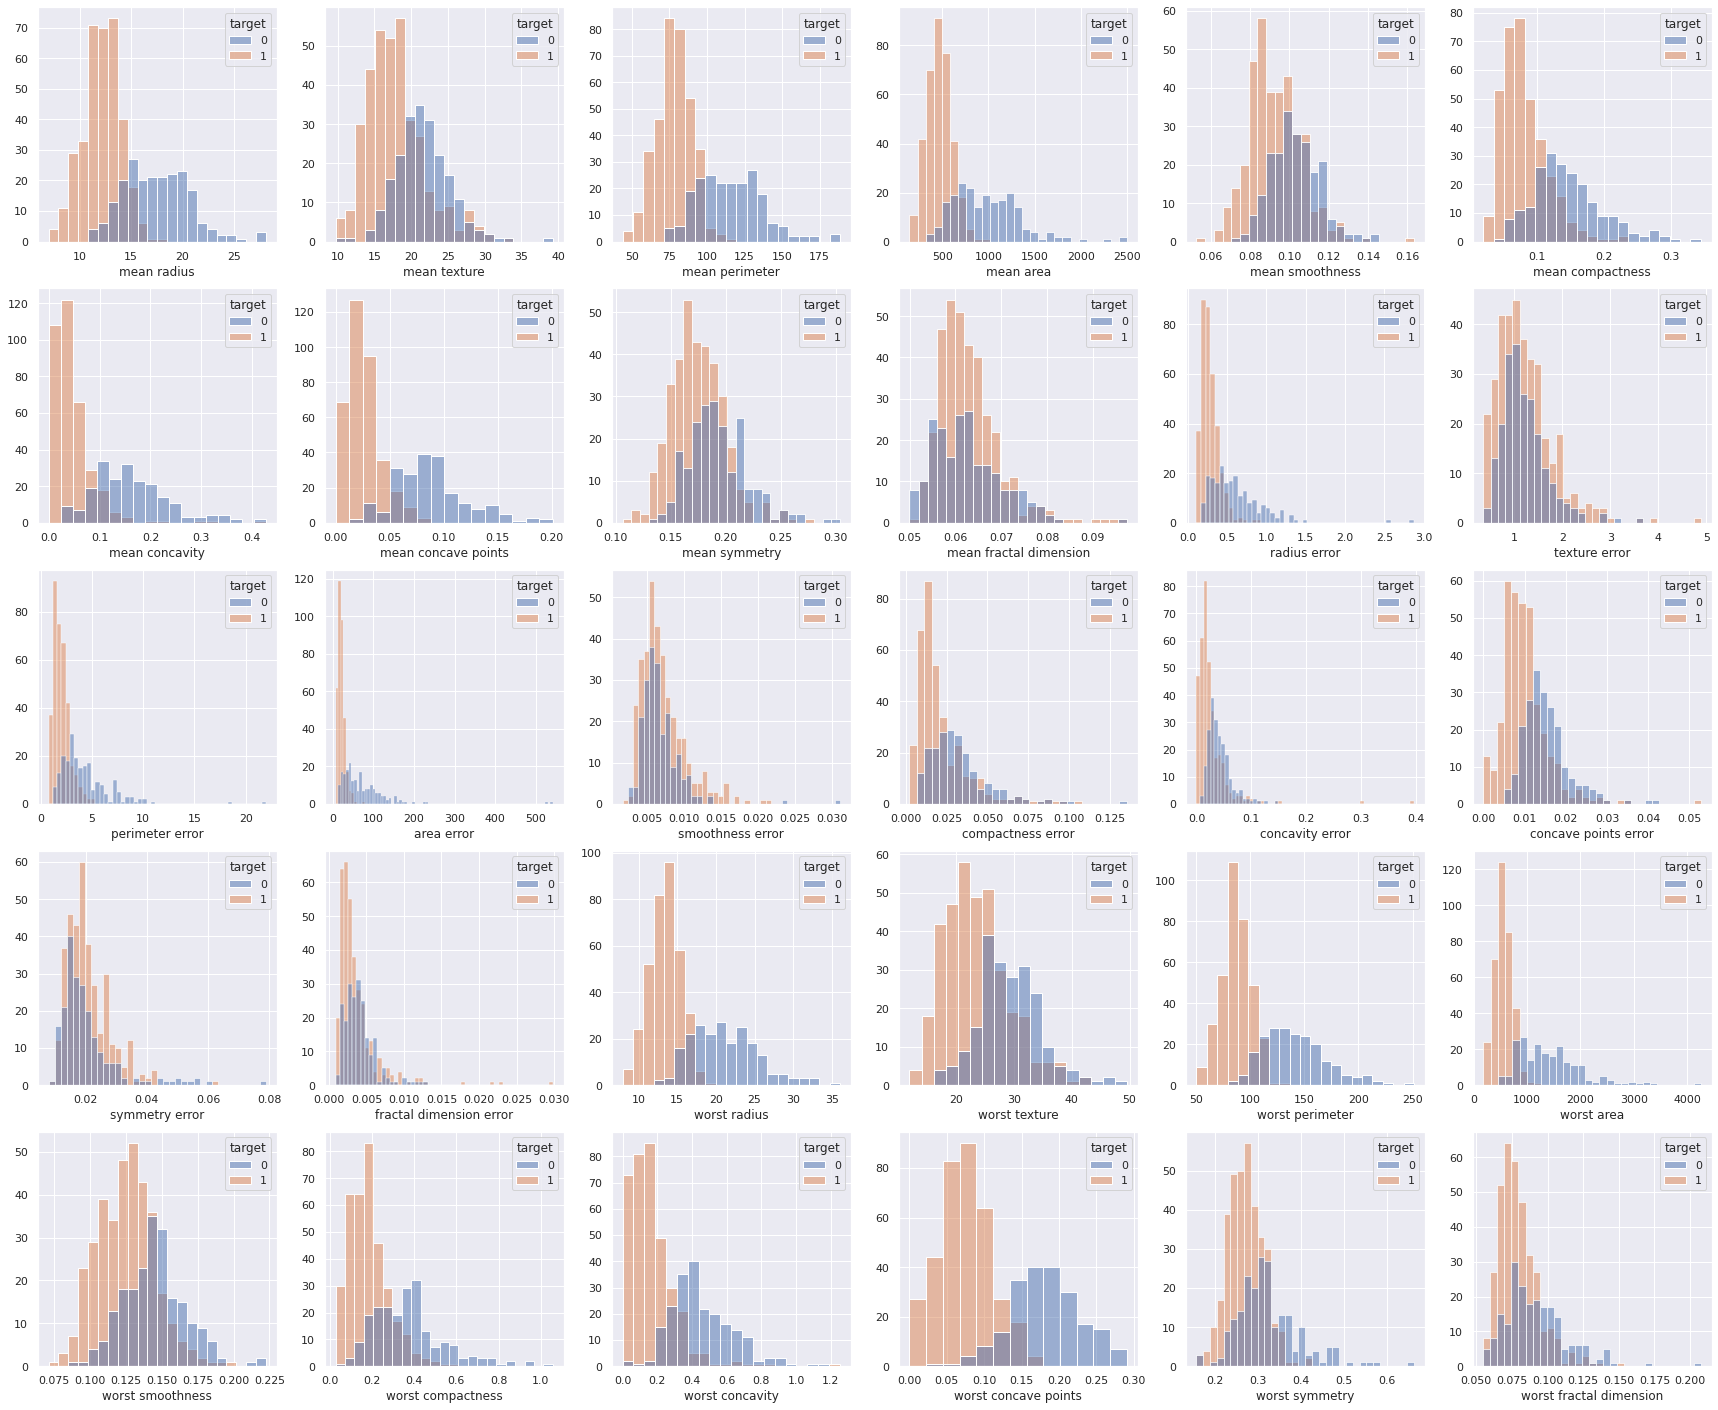

In [ ]:
fig, ax = plt.subplots(5, 6, figsize=(30,25))

for ax, x in zip(ax.flatten(), df.columns):
  sns.histplot(df, x=x, hue="target", ax=ax)
  ax.set_ylabel(None)

Esto nos da una idea de cómo se distribuye cada característica en las dos clases y nos permite tener información sobre cuáles características son mejores para distinguir muestras malignas y benignas. Por ejemplo, las características "texture errors" o “smoothness error” parecen poco informativas porque los dos histogramas se superponen en su mayoría, mientras que la característica “worst concave points” parece bastante informativa, porque los histogramas son bastante inconexos. Sin embargo, esta gráfica no nos muestra nada sobre las interacciones entre las características y su relación con las clases. 

Con PCA, podemos capturar las interacciones principales y obtener una imagen un poco más completa. Podemos encontrar las dos primeras componentes principales y visualizar los datos en este nuevo espacio bidimensional con un solo diagrama de dispersión


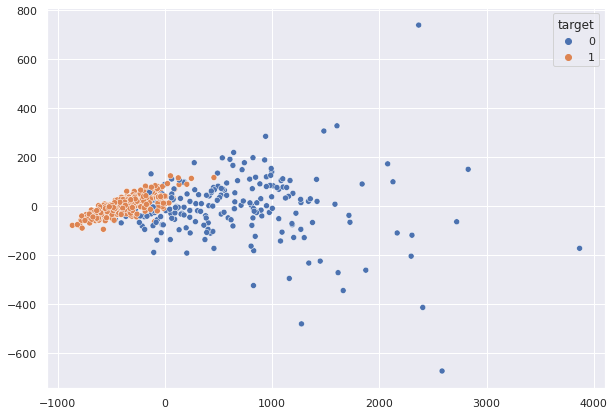

In [ ]:
X = df.drop(columns="target")

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df.target);

Note que esta representación se alterará si realizamos algún tipo de normalización sobre los datos. Construyamos un *pipeline* que encadene la estandarización de los datos y el PCA

In [ ]:
def standarized_pca(n_components=None):
  return make_pipeline(StandardScaler(),
                       PCA(n_components))

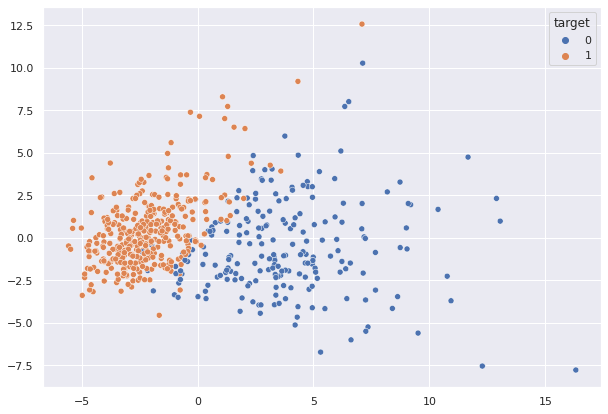

In [ ]:
X = df.drop(columns="target")

pca = standarized_pca(2)

X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df.target);

En esta nueva representación de los datos es más fácil entender y de visualizar la relación de las clases en comparación con la representación original. Podemos ver que las dos clases se separan bastante bien en este espacio bidimensional. Al igual que es más fácil para nosotros visualizar la relación de las clases con las características, tal vez esta representación sea más fácil de entender para un algoritmo de ML, podríamos pensar que incluso un clasificador lineal podría hacer un trabajo razonablemente bueno para distinguir las dos clases. Entrenemos un modelo de bosques aleatorios





In [ ]:
rf_clf = RandomForestClassifier()

cross_val_score(rf_clf, X_pca, df.target).mean()

0.9314702685918336

**Extracción de características y filtrado**

Otra aplicación de PCA es la extracción de características. La idea detrás de la extracción de características es que es posible encontrar una representación de los datos que se adapte mejor al análisis que la representación sin procesar. Adicionalmente, el PCA también se puede utlizar como filtrado de ruido. 

La idea es la siguiente: cualquier componente con una variación mucho mayor que el efecto del ruido no debería ser afectada significativamente por el ruido. Entonces, si se reconstruyen los datos utilizando solo un subconjunto de las primeras componentes principales, puede que se reduzca o elimine el ruido.

Vamos a explorar un poco un conjunto de datos que se utiliza para clasificar imágenes de digitos del 0 al 9. Veamos:

In [ ]:
data = load_digits()

# train data
X = data.data
y = data.target

X.shape

(1797, 64)

In [ ]:
# labels
data.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Las 64 características corresponden a valores de pixeles de una imagen 8x8

In [ ]:
X[0].reshape((8,8))

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Podemos visualizar estos datos numéricos como una imágen con la función `imshow` de matplotlib

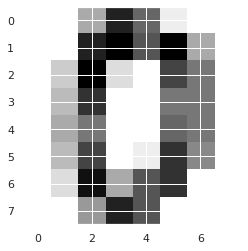

In [ ]:
plt.imshow(X[0].reshape((8,8)), cmap="binary");

Visualicemos estos datos en tres dimensiones:

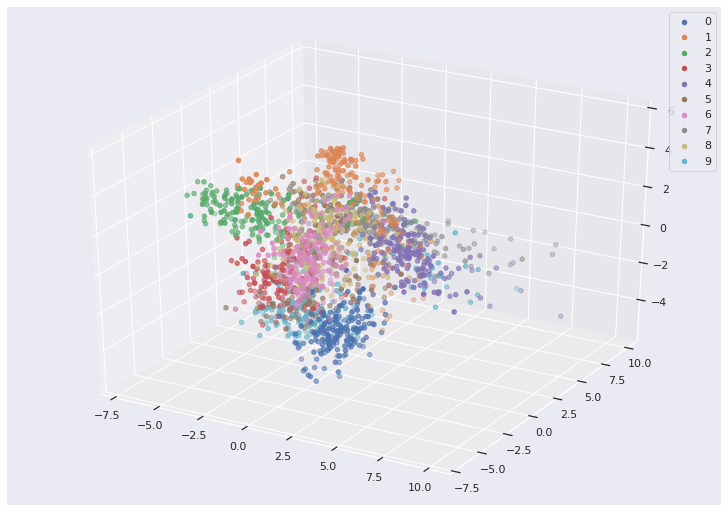

In [ ]:
pca = standarized_pca(3)
X_pca = pca.fit_transform(X)

fig = plt.figure(figsize=(10,7), constrained_layout=True)
ax = fig.add_subplot(111, projection="3d")

for target in data.target_names:
  ax.scatter(X_pca[y==target, 0], X_pca[y==target, 1], X_pca[y==target, 2], label=target)
ax.legend();

Entrenemos un modelo de SVM con los datos originales

In [ ]:
cross_val_score(SVC(), X, y).mean()

0.9632838130609718

Realicemos ahora el mismo proceso de entrenamiento utilizando los datos transformados

In [ ]:
cross_val_score(SVC(), X_pca, y).mean()

0.7317455896007428

Al reducir la dimensionalidad perdemos algo de información, por lo que aunque aceleramos el entrenamiento, también hacemos que el sistema funcione peor. Por lo tanto, primero se debe intentar entrenar con los datos originales antes de considerar usar la reducción de dimensionalidad si el entrenamiento es demasiado lento.

Sin embargo, en algunos casos, la reducción de la dimensionalidad de los datos de entrenamiento puede filtrar el ruido y detalles innecesarios como ya se mencionó y, por lo tanto, dar como resultado un mayor rendimiento (pero en general no lo hará; solo acelerará el entrenamiento).

Ahora, en lugar de elegir arbitrariamente el número de dimensiones a reducir, generalmente es preferible elegir el número de dimensiones que suman una porción suficientemente grande de la varianza. A menos que estemos reduciendo la dimensionalidad para la visualización de datos.

En lugar de especificar la cantidad de componentes principales que deseamos conservar, podemos establecer el kwarg `n_components` para que sea un valor entre 0 y 1, lo que indica la proporción de varianza que deseamos conservar



In [ ]:
pca = standarized_pca(0.9)

X_pca = pca.fit_transform(X)

In [ ]:
print(f"Número de componentes que retienen el 90 % de la varianza: {X_pca.shape[1]}")

Número de componentes que retienen el 90 % de la varianza: 31


Podemos visualizar qué tanta varianza retenemos en función del número de componentes si graficamos la `explained_variance_ratio_` en función del número de componentes principales

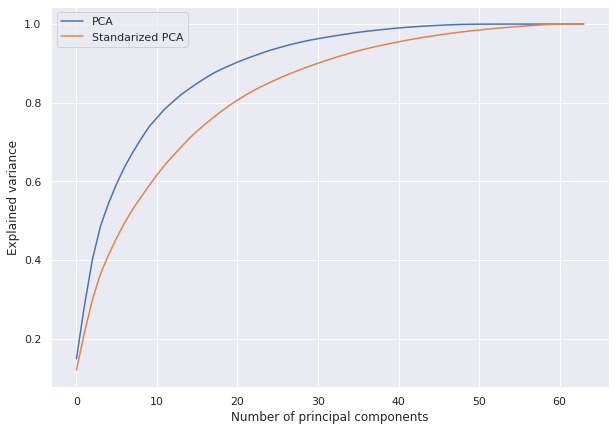

In [ ]:
pca1 = PCA().fit(X)
pca2 = standarized_pca().fit(X)

plt.figure(figsize=(10,7))
plt.plot(range(64), pca1.explained_variance_ratio_.cumsum(), label="PCA")
plt.plot(range(64), pca2["pca"].explained_variance_ratio_.cumsum(), label="Standarized PCA")
plt.xlabel("Number of principal components")
plt.ylabel("Explained variance")
plt.legend();

Por lo general, habrá un "codo" en la curva, donde la varianza deja de crecer rápidamente. En este caso, se puede ver que si reducimos la dimensionalidad a aproximadamente 40 dimensiones (PCA) no perderíamos demasiada varianza. Podemos pensar en esto como la dimensionalidad intrínseca del conjunto de datos.

Note además que el caso estandarizado está por debajo del caso no estandarizado, lo que evidencia que esta no retiene tanta varianza. Podemos evidenciar esto entrenando dos modelos para 40 componentes principales






In [ ]:
pca = standarized_pca(40)

X_pca = pca.fit_transform(X)

print(f"Standarized PCA: {cross_val_score(SVC(), X_pca, y).mean()}")

Standarized PCA: 0.947132466728567


In [ ]:
pca = PCA(40)

X_pca = pca.fit_transform(X)

print(f"PCA: {cross_val_score(SVC(), X_pca, y).mean()}")

PCA: 0.970516867842773


Anteriormente discutimos el truco del kernel, una técnica matemática que asigna implícitamente instancias a un espacio de muy alta dimensión, lo que nos permitió realizar clasificaciones no lineales. 

Resulta que se puede aplicar el mismo truco al PCA, lo que permite pasar de realizar proyecciones sobre hiperplanos que realiza el PCA, a proyecciones no lineales mucho más complejas para la reducción de dimensionalidad. Esto se puede implementar con la clase `KernelPCA`:

In [ ]:
from sklearn.decomposition import KernelPCA

kpca = KernelPCA()

Otras técnicas de reducción dimensional son:

* Multidimensional Scaling (MDS)
* Self-organizing maps (SOM)
* t-Distributed Stochastic Neighbor Embedding (t-SNE)
* Locally Linear Embedding (LLE)
* Linear Discriminant Analysis (LDA)

<p><a name="clu"></a></p>

# **Clustering: K-means**

El *Clustering* corresponde a la tarea de particionar el conjunto de datos en grupos de elementos similares, los cuales son llamados *clusters*. El objetivo consiste en separar los datos de tal forma que las instancias dentro de un cluster sean muy similares y se diferencien con las instancias de otros clusters. 

De forma similar a los algoritmos de clasificación, los algoritmos de agrupamiento asignan (o predicen) una etiqueta a cada instancia de los datos, lo que indica a qué cluster pertenece una instancia en particular.

**k-means** es uno de los algoritmos de agrupación más simples y más usados. Mediante este, se intenta encontrar los centros de los clusters que sean representativos de ciertas regiones de los datos. 

El algoritmo de `k-means` divide un conjunto de datos $X$ con $N$ instancias en $K$ clusters $C$, cada uno de ellos descrito por el valor medio $\mu_C$. A estos valores medios se les conoce comunmente como "centroides".

**Algoritmo**

* Se asigna un número de clusters $K$.
* Se asigna un centroide inicial determinado de forma aleatoria para cada cluster en el espacio de características.
* Se calcula la distancia de cada instancia a cada centroide $C$.
* Se asigna cada instancia al centroide más cercano.
* Para cada centroide, se calcula el valor medio de las instancias etiquetadas con este. Estos valores medios se convierten en las nuevas locaciones de los centroides

El algoritmo finaliza cuando la asignación de instancias a clusters ya no cambia. 




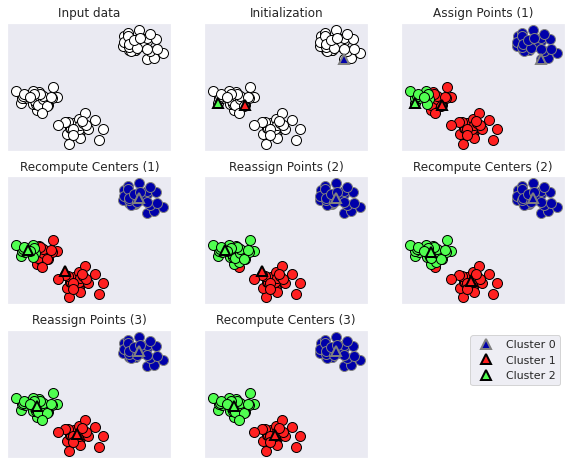

De forma general, el algoritmo de **k-means** intenta minimizar la distancias dentro de un cluster y maximizar la distancia entre clusters, para los centroides iniciales. Cuantitativamente, `K-means` intenta determinar centroides que minimizan la **inercia**, o **suma de cuadrados dentro de un cluster**:

$$
\sum_{i=0}^N \min_{\mu_j\in C}(||x_i-\mu_j||^2)
$$

Apliquemos el algoritmo al siguiente conjunto de datos. 

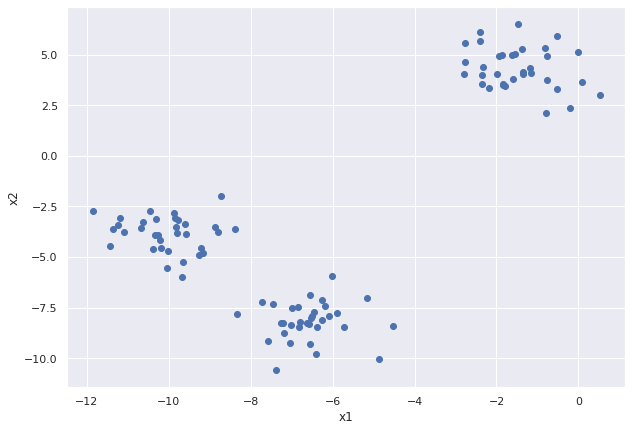

In [ ]:
X, y = make_blobs(centers=3, n_samples=100, cluster_std=1, random_state=1)

plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1])
plt.xlabel("x1")
plt.ylabel("x2");

El algoritmo se encuentra en la clase `KMeans` del submódulo `cluster` de Sklearn:

In [ ]:
from sklearn.cluster import KMeans 

model = KMeans(n_clusters=3).fit(X)

Una vez entrenado el modelo podemos obtener los grupos en el atributo `cluster_centers_`

In [ ]:
centers = model.cluster_centers_
centers

array([[-10.04935243,  -3.85954095],
       [ -1.4710815 ,   4.33721882],
       [ -6.58196786,  -8.17239339]])

Durante el algoritmo, a cada instancia de entrenamiento se le asigna una etiqueta de grupo. Podemos encontrar estas etiquetas en el atributo `labels_`


In [ ]:
y = model.labels_
y

array([1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 2, 0,
       2, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 1, 0,
       0, 2, 1, 1, 1, 1, 0, 2, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 0, 2,
       1, 2, 1, 0, 0, 0, 2, 1, 1, 0, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1,
       0, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1], dtype=int32)

la inercia asociada al entrenamiento en el atributo `intertia_`

In [ ]:
model.inertia_

156.28289251170003

Visualicemos el resultado:

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


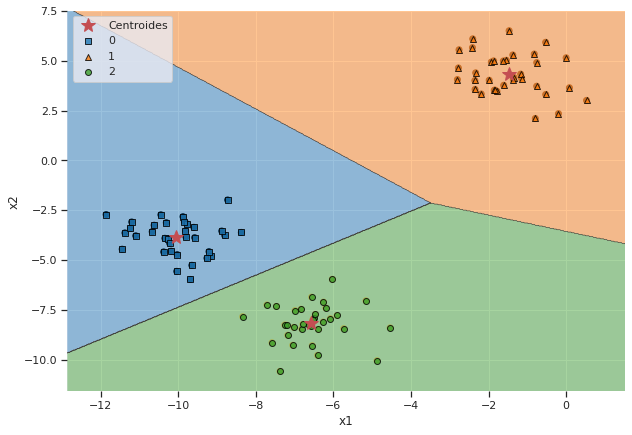

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(centers[:,0], centers[:,1], "r*", markersize=15, label="Centroides")
plt.scatter(X[:,0], X[:,1], c=y, cmap="copper")
plt.xlabel("x1")
plt.ylabel("x2")
plot_decision_regions(X, y, model)
plt.legend();

Podemos ver que la agrupación en grupos es algo similar a la clasificación, ya que cada elemento recibe una etiqueta. Sin embargo las etiquetas en sí mismas no tienen un significado a priori.

Un desafío importante en el aprendizaje no supervisado es evaluar si el algoritmo aprendió algo útil: no sabemos cuál debería ser el resultado correcto. Por lo tanto, es muy difícil decir si un modelo "funcionó bien". No hay forma de que podamos "decirle" al algoritmo lo que estamos buscando y, a menudo, la única forma de evaluar el resultado de un algoritmo no supervisado es inspeccionarlo manualmente.

Ahora, incluso si conocemos el número "correcto" de clústeres para un conjunto de datos determinado, es posible que k-means no siempre sea capaz de encontrarlos. La pregunta es entonces ¿Cómo podemos saber el número de clusters a usar? 

* Una estrategia es graficar el número de clusters en función de la inercia. Esta técnica para elegir el mejor valor para el número de *clusters* es bastante burda. 

* Un enfoque más preciso (pero también más costoso computacionalmente) es usar el puntaje *silhoutte*. El coeficiente de silueta de una instancia es igual

  $$
  \frac{b - a}{\max(a, b)}
  $$

donde $a$ es la distancia media a las otras instancias en el mismo grupo (distancia media dentro del grupo). $b$ es la distancia media a las instancias del grupo más cercano. 

Este varia entre -1 y +1: un coeficiente cercano a +1 significa que la instancia está dentro de su propio grupo y lejos de otros grupos. si el coeficiente es cercano a 0 significa que está cerca a la frontera de un grupo. y finalmente, un coeficiente cercano a -1 significa que la instancia puede haber sido asignada al grupo incorrecto

El puntaje de silueta es el coeficiente de silueta medio de todas las instancias. Este se encuentra como `silhouette_score` en el submódulo de métricas de Sklearn



In [ ]:
from sklearn.metrics import silhouette_score

# numero de clusters a utilizar
K = np.arange(1,7)

# listas para almacenar los puntajes de 
# inercia y silueta
inertia = []
sil = []

# entrenamos un modelo para cada numero
# de clusters y guardamos los puntajes
for k in K:
  kmeans = KMeans(n_clusters=k).fit(X)
  inertia.append(kmeans.inertia_)
  if k > 1:
    sil.append(silhouette_score(X, kmeans.labels_))
  else:
    sil.append(0)

Veamos los resultados

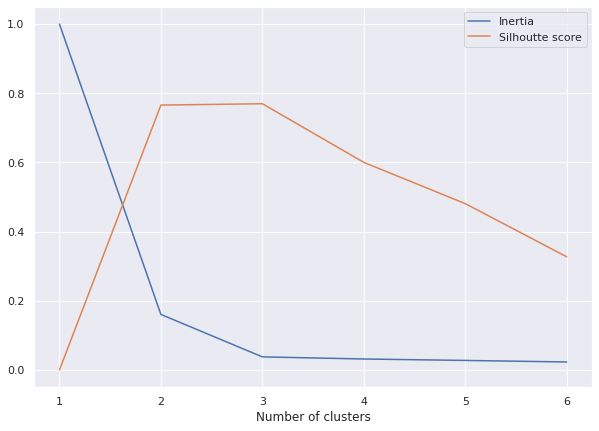

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(K, inertia/np.max(inertia), label="Inertia")
plt.plot(K, sil, label="Silhoutte score")
plt.xlabel("Number of clusters")
plt.legend();

El número óptimo de centros se encuentra en el punto ("codo") a partir del cual la inercia no dismnuye considerablemente o cuando el puntaje de silueta alcanza un máximo. En este caso, vemos que el número óptimo de centros es 3, que efectivamente corresponde al número de centros del conjunto de datos.



**Problemas del K-means**

Cada cluster se define únicamente por su centro, lo que significa que cada cluster tiene una forma circular. Como resultado de esto, k-means solo puede capturar formas relativamente simples. 

k-means asume que todos los clusters tienen el mismo "diámetro". Por lo tanto siempre construye fronteras de decisión entre los clusters para que estén exactamente en el medio entre los clusters. 

`k-means` asume tambien que todas las direcciones son igual de importantes para cada cluster, por lo que el algoritmo no funcionará muy bien si los clusters tienen geometrías complicadas. En particular, las fronteras entre los clusters con k-means siempre serán lineales, lo que significa que fallará para fronteras más complicadas.

Otro problema es que no tiene una noción de probabilidad, lo que no permite tener una estimación de la incertidumbre.

Por ejemplo, en el siguiente conjunto de datos

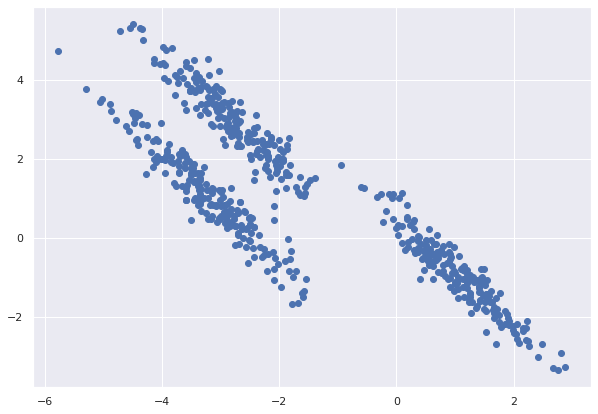

In [ ]:
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1]);

k-means no tendrá buenos resultados debido a estos problemas que se mencionaron. Entrenemos un modelo de k-means con tres centroides:

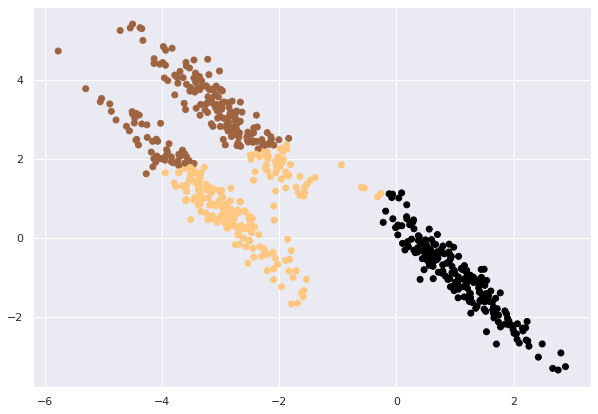

In [ ]:
kmeans = KMeans(3).fit(X)
y = kmeans.labels_

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="copper");

**GM models (GMM)**

Podemos utilizar unos modelos que generalizan las ideas del k-means, conocidos como *gaussian mixture models:*, que resuelven dos de las desventajas del k-means: su falta de flexibilidad en la forma del grupo y la falta de asignación de probabilidad o incertidumbre a los grupos. Estos modelo son modelos probabilísticos que asumen que las instancias se generaron a partir de una mezcla de varias distribuciones gaussianas cuyos parámetros se desconocen.

Este modelo se puede implementar con la clase `GaussianMixture` del submódulo `mixture` de Sklearn


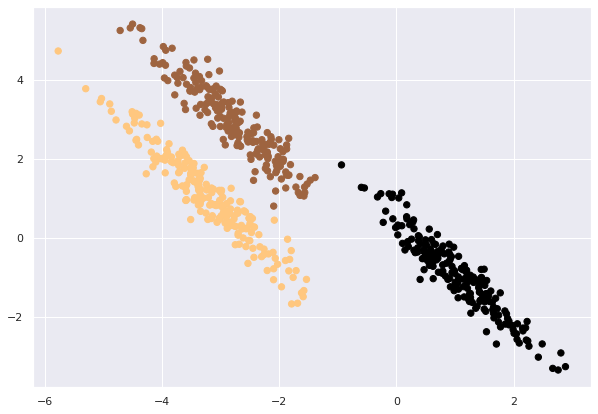

In [ ]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)

plt.figure(figsize=(10,7))
plt.scatter(X[:, 0], X[:,1], c=labels, s=40, cmap='copper');

Otras técnicas de agrupamiento son:

* *Bayesian Gaussian Mixture*
* *Hierarchical clustering*
* *Density-based clustering* (DBSCAN)
* *Spectral clustering*
* *Fuzzy clustering*
* *Clustering based on kernel*
* *Clustering based on ensemble*
* *Clustering based on swarm intelligence*

<p><a name="ele"></a></p>

# **Elección del modelo de aprendizaje**

Todos los modelos posibles de una familia de modelos dada comparten una estructura común y se diferencian en puntos específicos (hiperparámetros) dentro de esta "plantilla" común. 

Ya vimos cómo podemos caracterizar los modelos entre modelos probabilísticos y no probabilísticos, lo cual nos permite tener una noción de incertidumbre ya que tenemos acceso a la probabilidad asociada a una predicción. Otra distinción útil es la de modelos paramétricos y no paramétricos:

* **Modelos paramétricos**: 

  En este caso, los diferentes modelos dentro de la familia de modelos tienen un número fijo de parámetros $\mathbf{w}$ (o pesos) y se diferencian entre sí en los valores específicos de cada parámetro. Modelos como la regresión logística, Naive Bayes, y por ejemplo las redes neuronales, se encuentran en esta categoría.

  Aquí, se puede plantear el problema de encontrar el mejor modelo como el problema de encontrar el valor óptimo para cada parámetro, de modo que se minimice alguna métrica de rendimiento (función de costo) $J$ como ya hemos visto.

  Una ventaja de este tipo de modelos es que el tamaño del modelo es independiente del tamaño del conjunto de entrenamiento y, a menudo, es proporcional al número de características, es decir, estos modelos "comprimen" el conjunto de entrenamiento en una especie de "fórmula" de tamaño fijo.
  
  El mayor inconveniente es que cada familia de modelos implica ciertas suposiciones sobre los datos, y si se asumen las incorrectas, es muy probable subajustar los datos (por ejemplo cuando se utiliza la regresión logística sobre datos con relaciones no lineales).
  

* **Modelos no paramétricos**:

  En este caso, los diferentes modelos de la misma familia de modelos tienen un número variable de parámetros que a menudo depende del tamaño del conjunto de entrenamiento. Algunos ejemplos simples de modelos no paramétricos son el SVM (con kernels no lineales) y los árboles de decisión.

  La principal ventaja de estos modelos es que a menudo implican suposiciones más "débiles" sobre los datos y pueden adaptarse a conjuntos de datos complejos más fácilmente que los modelos paramétricos igualmente complejos.

  Un inconveniente de este tipo de modelos es que el tamaño del modelo a veces es proporcional al tamaño del conjunto de entrenamiento, lo que lo hace menos adecuado para aprender conjuntos de datos muy grandes. Otro inconveniente es que al depender de los datos de entrenamiento el proceso de ajuste de hiperparámetros será muy específico.


Entonces, ¿Cuál es la mejor elección que podemos hacer de un modelo? La respuesta es, por supuesto, *depende*. Depende de la naturaleza del problema a resolver, la cantidad y calidad de los datos disponibles y lo que se pretenda hacer con esa solución.

Si se conocen bien los datos y se tienen claras ciertas suposiciones (por ejemplo, relaciones lineales), se puede elegir un modelo paramétrico que mejor se adapte a esas suposiciones. Si no se tiene claridad respecto a los datos, algunos de los modelos no paramétricos más potentes (árboles de decisión, SVM o métodos de ensamble) a menudo funcionan relativamente bien con pocos ajustes.

Por otro lado, si el objetivo es tener un modelo interpretable, modelos como la regresión lineal, regresión lineal regularizada, regresión logística o árboles de decisión son una buena alternativa. Si el objetivo es tener un mayor poder predictivo, modelos más complejos como los modelos de ensamble (XGBoost, Bagging) generalmente serán una mejor opción



![](https://i.imgur.com/R1DpR9N.png)

En cualquier caso, **nada sustituye a la experimentación**. Siempre nos debemos asegurar de evaluar diferentes modelos y decidir basándonos en el rendimiento de estos en lugar de la intuición.

![](https://i.imgur.com/HBd9C0n.png)